In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Load the Data Set
def load_grades_data():
    data = np.loadtxt("grades.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

X_train, y_train = load_grades_data()
X_features = ['Exam 1 Score','Exam 2 Score']

print(f"Shape of the Data Set: {X_train.shape}")
print(f"Number of Training Examples: {X_train.shape[0]}")
print(f"Number of Features: {X_train.shape[1]}")

Shape of the Data Set: (100, 2)
Number of Training Examples: 100
Number of Features: 2


In [3]:
print(X_train[:5])
print(f"Shape of X: {X_train.shape}")
print("\n")

print(y_train[:5])
print(f"Shape of y: {y_train.shape}")

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Shape of X: (100, 2)


[0. 0. 0. 1. 1.]
Shape of y: (100,)


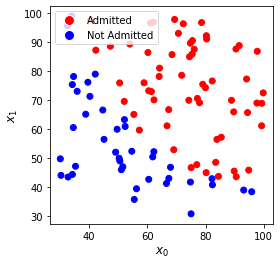

In [4]:
# Visualization
fig, ax = plt.subplots(1, 1, figsize=(4,4))

# Create a list of colors based on y_train values
colors = ['blue' if y == 0 else 'red' for y in y_train]

ax.scatter(X_train[:,0], X_train[:,1], c=colors)

# Create a Legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Admitted', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Not Admitted', markerfacecolor='blue', markersize=10)]

ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)
plt.show()

## Model: Logistic Regression
#### g is the Sigmoid Function (Logistic Function)
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)}) \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}
\end{align}
$$
  
$$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = P(y=1 \mid \mathbf{x}; \mathbf{w}, b)$$
If $f_{\mathbf{w},b}(x) >= 0.5$, Predict $y=1$

If $f_{\mathbf{w},b}(x) < 0.5$, Predict $y=0$

#### Decision Boundary: $z = \mathbf{w} \cdot \mathbf{x} + b = 0$

  If $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the Model Predicts $y=1$
  
  If $\mathbf{w} \cdot \mathbf{x} + b < 0$, the Model Predicts $y=0$

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z.

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1 + np.exp(-z))
    return g

In [6]:
# Test the Sigmoid Function
z = np.array([-100, 0, 100])
print(f"z: {z}, Sigmoid(z): {sigmoid(z)}")
print(f"Sigmoid(Small Num): {sigmoid(-100)}")
print(f"Sigmoid(0): {sigmoid(0)}")
print(f"Sigmoid(Large Num): {sigmoid(100)}")
print(f"\n")

# Test the Sigmoid Function on our Data
m, n = X_train.shape
w_tmp = np.zeros(n)
b_tmp = 0

for i in range(5):
    print(f"z: {np.dot(w_tmp, X_train[i]) + b_tmp} Sigmoid(z): { sigmoid(np.dot(w_tmp, X_train[i]))}")

z: [-100    0  100], Sigmoid(z): [3.72007598e-44 5.00000000e-01 1.00000000e+00]
Sigmoid(Small Num): 3.7200759760208356e-44
Sigmoid(0): 0.5
Sigmoid(Large Num): 1.0


z: 0.0 Sigmoid(z): 0.5
z: 0.0 Sigmoid(z): 0.5
z: 0.0 Sigmoid(z): 0.5
z: 0.0 Sigmoid(z): 0.5
z: 0.0 Sigmoid(z): 0.5


Text(0, 0.5, 'Sigmoid(z)')

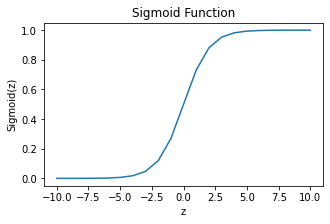

In [7]:
# Plot the Sigmoid Function (A General Case)
z_tmp = np.arange(-10, 11)
y = sigmoid(z_tmp)

fig, ax = plt.subplots(1, 1, figsize=(5,3))

ax.plot(z_tmp, y)
ax.set_title("Sigmoid Function")
ax.set_xlabel("z")
ax.set_ylabel("Sigmoid(z)")

## Cost Function:  Log-Loss (Binary Cross-Entropy Loss)
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \ $$
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \ $$

$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)}) \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}
\end{align}
$$

In [8]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost.

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    # Number of Training Examples
    m = X.shape[0]
    cost = 0
    
    # Loop m
    for i in range(m):
        # Add Loss Function to the Cost Function
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)
        loss_i = -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-(f_wb_i))
        cost += loss_i
    
    cost /= m
    return cost

In [9]:
logistic_cost = compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)
print(logistic_cost)

0.6931471805599458


In [10]:
# Non-Zero Parameters
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost_logistic(X_train, y_train, test_w, test_b)

print(f'Cost at Test w and b (Non-Zeros): {cost}')

Cost at Test w and b (Non-Zeros): 0.21833019382659777


## Batch Gradient Descent
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace \text{simultaneous updates}
\end{align*}$$

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$

In [11]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradients for logistic regression. 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    # Shape of the Data
    m, n = X.shape
    
    # Initialize the Gradients
    dj_dw = np.zeros(n)
    dj_db = 0
    
    # Loop through the Examples
    for i in range(m):
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        
        # Loop through the Features
        for j in range(n):
            dj_dw[j] += err_i * X[i ,j]
            
        dj_db += err_i
        
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db  

In [12]:
dj_dw, dj_db = compute_gradient_logistic(X_train, y_train, w_tmp, b_tmp)

print(f"dj_dw: {dj_dw}")
print(f"dj_db: {dj_db}")

dj_dw: [-12.00921659 -11.26284221]
dj_db: -0.1


In [13]:
# Non-Zero Parameters
test_w = np.array([0.2, -0.5])
test_b = -24.
dj_dw, dj_db = compute_gradient_logistic(X_train, y_train, test_w, test_b)

print(f"dj_dw: {dj_dw}")
print(f"dj_db: {dj_db}")

dj_dw: [-44.83135362 -44.37384125]
dj_db: -0.5999999999991071


In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    # Shape of the Data
    m, n = X.shape
    
    # An Array to Store Cost J and w's at Each Iteration 
    J_history = []
    
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        # Calculate the Gradient 
        dj_dw, dj_db = gradient_function(X, y, w, b)
        
        # Update the Parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save Cost J at Each Iteration
        if i < 100000: # Prevent Resource Exhaustion 
            J_history.append(cost_function(X, y, w, b))
        
        # Save and Print Cost at Each Thousandth Iteration
        if (i%1000) == 0:
            print(f"Iteration {i:4d}, Cost: {J_history[i]:8.2f}")
            
    return w, b, J_history

In [15]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

alpha = 0.001
iterations = 10000

w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, 
                                   compute_cost_logistic, compute_gradient_logistic, alpha, iterations)
print(f"\nUpdated Parameters: w:{w}, b:{b}")

Iteration    0, Cost:     0.96
Iteration 1000, Cost:     0.31
Iteration 2000, Cost:     0.30
Iteration 3000, Cost:     0.30
Iteration 4000, Cost:     0.30
Iteration 5000, Cost:     0.30
Iteration 6000, Cost:     0.30
Iteration 7000, Cost:     0.30
Iteration 8000, Cost:     0.30
Iteration 9000, Cost:     0.30

Updated Parameters: w:[0.07125355 0.06482888], b:-8.188622906639248


114.9223129908513
126.31135021396497


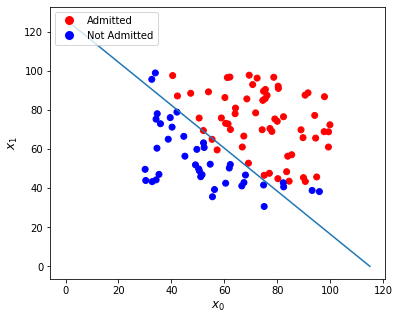

In [16]:
# Plotting the Decision Boundary
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Create a list of colors based on y_train values
colors = ['blue' if y == 0 else 'red' for y in y_train]

ax.scatter(X_train[:,0], X_train[:,1], c=colors)

# Create a Legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Admitted', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Not Admitted', markerfacecolor='blue', markersize=10)]

ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)

# Plot the Decision Boundary (z = 0)
"""
In this code, we're calculating the decision boundary for a logistic regression model with two input features. 
The decision boundary is a line (or hyperplane) that separates the data points into two classes, based on the model's predictions.

For a logistic regression model, the decision function is:
z = w0 * x0 + w1 * x1 + b
where w0 and w1 are the weights for the two features (x0 and x1), and b is the bias term.

The model predicts class 1 if z >= 0 and class 0 if z < 0. The decision boundary occurs when z = 0.

To find the decision boundary, we can set z = 0 and solve for x1 in terms of x0 (or vice versa):
w0 * x0 + w1 * x1 + b = 0
"""
x0 = -b/w[0] # x1 = 0
x1 = -b/w[1] # x0 = 0

print(x0)
print(x1)

ax.plot([x0,0],[0,x1])

plt.show()

## Evaluation
- Compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for each example 
- To get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, use the following heuristic -

  If $f(x^{(i)}) >= 0.5$, Predict $y^{(i)}=1$
  
  If $f(x^{(i)}) < 0.5$, Predict $y^{(i)}=0$

In [17]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w.
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # Number of Training Examples
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):
        z_wb_i = np.dot(w, X[i, :]) + b
        f_wb_i = sigmoid(z_wb_i)
        
        p[i] = f_wb_i >= 0.5
        
    return p

In [18]:
# Compute the Accuracy on our Training Set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
